In [1]:
#import os
import numpy as np
import pandas as pd
import tensorflow as tf
from numpy import loadtxt
import tensorflow.keras as k
from tensorflow.keras import layers as l
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
path= "/Users/shahrasm/Documents/Graduation_project/"
modelpath=path+"bestmodel"
col=range(71)

train_data = pd.read_csv(path+'train_data.csv',names=col)#, delimiter=',')
Xtr = train_data.loc[:,1:]
ytr = train_data.loc[:,0]

In [3]:
test_data = pd.read_csv(path+'test_data.csv',names=col)
Xts = test_data.loc[:,1:]
yts = test_data.loc[:,0]

In [5]:
tr=[]
for c in range(1,71):
    e=Xtr[c]
    meanc=np.mean(e) 
    varc=np.var(e) 
    normalize=l.Normalization(mean=meanc,variance=varc)
    e=normalize(e)
    tr.append(e)


In [6]:
ts=[]
for c in range(1,71):
    e=Xts[c]
    meanc=np.mean(e) 
    varc=np.var(e) 
    normalize=l.Normalization(mean=meanc,variance=varc)
    e=normalize(e)
    ts.append(e)

In [7]:
Xtr=np.array(tr)
Xtr=np.transpose(Xtr)
Xts=np.array(ts)
Xts=np.transpose(Xts)

In [23]:
reg12=tf.keras.regularizers.l1_l2()
reg12=tf.keras.regularizers.l2()
#callback=k.callbacks.EarlyStopping(monitor="val_binary_accuracy", baseline=79., patience=250, verbose=1, restore_best_weights=True)
#callback=k.callbacks.ModelCheckpoint(filepath=modelpath,save_weights_only=True,monitor='val_binary_accuracy',mode='max',save_best_only=True)

In [32]:
myins = []
for c in range(1,71):
    d=l.Input(shape=(1,), dtype=tf.float32) 
    myins.append(d) 

In [33]:
r0=l.Lambda(lambda x:l.concatenate(x))(myins)
r=l.Reshape((1,70))(r0)


In [42]:
Project=l.Dense(1024, activation='linear',activity_regularizer=reg12)    

key=Project(r)
val=Project(r)
query=Project(r)
vk=l.Attention()([key,val])
vkq=l.Concatenate()([vk,query])

r=l.Dropout(0.25)(vkq)

fc=l.Dense(512, activation='linear',activity_regularizer=reg12)(r)
fc=l.Dropout(0.25)(fc)
fc=l.Dense(128, activation='linear',activity_regularizer=reg12)(fc)
fc=l.Dropout(0.25)(fc)
fc=l.Dense(64, activation='linear',activity_regularizer=reg12)(fc)
fc=l.Dropout(0.25)(fc)
pre=l.Dense(1, activation='sigmoid',activity_regularizer=reg12)(fc)
model = k.Model(inputs=r0, outputs=pre)


In [51]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_287 (InputLayer)         [(None, 70)]         0           []                               
                                                                                                  
 reshape_3 (Reshape)            (None, 1, 70)        0           ['input_287[0][0]']              
                                                                                                  
 dense_20 (Dense)               (None, 1, 1024)      72704       ['reshape_3[3][0]',              
                                                                  'reshape_3[3][0]',              
                                                                  'reshape_3[3][0]']              
                                                                                            

In [43]:
opt=k.optimizers.Adam(lr=1e-6)
#metric= [k.metrics.BinaryAccuracy()]  
model.compile(loss='binary_crossentropy',  optimizer=opt  , metrics='accuracy')
history=model.fit(Xtr, ytr, validation_split=0.10, epochs=150, batch_size=64)

Epoch 1/150
6/6 [==============================] - 2s 129ms/step - loss: 1.1072 - accuracy: 0.4899 - val_loss: 0.9476 - val_accuracy: 0.4872
Epoch 2/150
6/6 [==============================] - 0s 58ms/step - loss: 1.1096 - accuracy: 0.4467 - val_loss: 0.9411 - val_accuracy: 0.5641
Epoch 3/150
6/6 [==============================] - 0s 59ms/step - loss: 1.0879 - accuracy: 0.5533 - val_loss: 0.9349 - val_accuracy: 0.6154
Epoch 4/150
6/6 [==============================] - 0s 58ms/step - loss: 1.0809 - accuracy: 0.5389 - val_loss: 0.9294 - val_accuracy: 0.5897
Epoch 5/150
6/6 [==============================] - 0s 58ms/step - loss: 1.0807 - accuracy: 0.5303 - val_loss: 0.9237 - val_accuracy: 0.6154
Epoch 6/150
6/6 [==============================] - 0s 59ms/step - loss: 1.0735 - accuracy: 0.5216 - val_loss: 0.9185 - val_accuracy: 0.6410
Epoch 7/150
6/6 [==============================] - 0s 59ms/step - loss: 1.0568 - accuracy: 0.5994 - val_loss: 0.9134 - val_accuracy: 0.6667
Epoch 8/150
6/6 [==

6/6 [==============================] - 0s 59ms/step - loss: 0.8442 - accuracy: 0.8184 - val_loss: 0.8271 - val_accuracy: 0.7179
Epoch 60/150
6/6 [==============================] - 0s 61ms/step - loss: 0.8453 - accuracy: 0.8271 - val_loss: 0.8271 - val_accuracy: 0.7179
Epoch 61/150
6/6 [==============================] - 0s 64ms/step - loss: 0.8350 - accuracy: 0.8213 - val_loss: 0.8271 - val_accuracy: 0.7179
Epoch 62/150
6/6 [==============================] - 0s 60ms/step - loss: 0.8363 - accuracy: 0.8271 - val_loss: 0.8270 - val_accuracy: 0.7179
Epoch 63/150
6/6 [==============================] - 0s 60ms/step - loss: 0.8304 - accuracy: 0.8473 - val_loss: 0.8268 - val_accuracy: 0.7179
Epoch 64/150
6/6 [==============================] - 0s 63ms/step - loss: 0.8286 - accuracy: 0.8415 - val_loss: 0.8268 - val_accuracy: 0.7179
Epoch 65/150
6/6 [==============================] - 0s 69ms/step - loss: 0.8373 - accuracy: 0.8300 - val_loss: 0.8267 - val_accuracy: 0.7179
Epoch 66/150
6/6 [========

6/6 [==============================] - 0s 58ms/step - loss: 0.7697 - accuracy: 0.8501 - val_loss: 0.8318 - val_accuracy: 0.7436
Epoch 118/150
6/6 [==============================] - 0s 57ms/step - loss: 0.7711 - accuracy: 0.8473 - val_loss: 0.8320 - val_accuracy: 0.7436
Epoch 119/150
6/6 [==============================] - 0s 61ms/step - loss: 0.7803 - accuracy: 0.8473 - val_loss: 0.8320 - val_accuracy: 0.7436
Epoch 120/150
6/6 [==============================] - 0s 58ms/step - loss: 0.7784 - accuracy: 0.8444 - val_loss: 0.8321 - val_accuracy: 0.7436
Epoch 121/150
6/6 [==============================] - 0s 57ms/step - loss: 0.7741 - accuracy: 0.8386 - val_loss: 0.8322 - val_accuracy: 0.7436
Epoch 122/150
6/6 [==============================] - 0s 60ms/step - loss: 0.7685 - accuracy: 0.8329 - val_loss: 0.8323 - val_accuracy: 0.7436
Epoch 123/150
6/6 [==============================] - 0s 60ms/step - loss: 0.7690 - accuracy: 0.8530 - val_loss: 0.8324 - val_accuracy: 0.7436
Epoch 124/150
6/6 [=

In [44]:
_,accuracy = model.evaluate(Xtr,ytr)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 10ms/step - loss: 0.6385 - accuracy: 0.8394
Accuracy: 83.94


In [45]:
_,accuracy = model.evaluate(Xts,yts)
print('Accuracy: %.2f' % (accuracy*100))

6/6 [==============================] - 0s 11ms/step - loss: 0.7836 - accuracy: 0.7229
Accuracy: 72.29


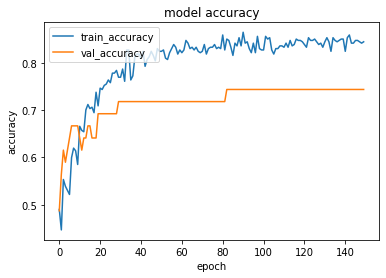

In [48]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc = 'upper left')
plt.savefig("train_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()


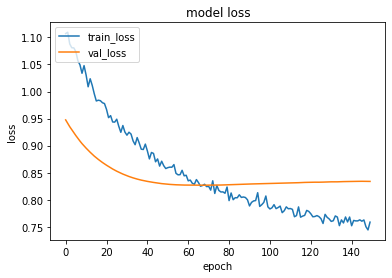

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.savefig("train_loss.png", dpi=300, bbox_inches='tight')
plt.show()


In [53]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [50]:
predictions = (model.predict(Xts) > 0.5).astype("int32")
for i in range(55):
	print('%s => %d (expected %d)' % (Xts[i].tolist(), predictions[i], yts[i]))

[0.3114757835865021, 2.451990842819214, -0.5653076171875, -0.38284534215927124, -0.3862802982330322, 0.3820266127586365, -0.41202428936958313, -0.009012308903038502, -0.017634233459830284, 0.12609925866127014, -0.2928515076637268, -0.40731319785118103, -0.5628179907798767, -0.5522150993347168, -0.4858282208442688, 1.0618224143981934, 1.5836580991744995, 2.2417190074920654, -0.07532539963722229, 0.13622082769870758, 0.9174615740776062, 1.2985647916793823, 1.3697665929794312, 0.34668976068496704, 0.22454866766929626, -1.0588924884796143, 0.3947890102863312, -0.0333208404481411, -0.6213731169700623, -0.6205173134803772, 0.12463404983282089, -1.0353989601135254, -0.05906940996646881, 0.7720614671707153, -0.2537893056869507, 0.31287798285484314, 0.7770242691040039, -0.2889033555984497, 0.750374972820282, -0.33576083183288574, 3.8448832035064697, 1.6248528957366943, -0.6104757189750671, -0.2579743564128876, 0.6660791039466858, 0.3151131868362427, 1.0158528089523315, -0.4658922553062439, -0.3